# In this file we will evaluate the DVHs for the first three patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fraction_dictionary = {
    '1a': 0,
    '1aA': 1,
    '1aB': 2,
    '1aC': 3,
    '1aD': 4,
    '1aE': 5,
}

In [2]:
overlaps_3 = np.array([9.08,19.79,6.02,9.45,19.59,12.62])
overlaps_14 = np.array([2.88,3.35,3.35,0.53,1.92,3.66])
overlaps_18 = np.array([0.92, 0.83, 1.08, 1.91, 0.00, 0.58])
overlaps_25 = np.array([0.41,0.44,0.75,0.00,0.00,0.38])
overlaps_26 = np.array([2.11,2.14,0.87,3.57,2.59,1.91])
overlaps_49 = np.array([4.27,5.91,3.28,3.87,4.18,8.36])
overlaps = [overlaps_3, overlaps_14, overlaps_18, overlaps_25, overlaps_26, overlaps_49]

AF_doses_3 = [6,6,9,6,6,6]
AF_doses_14 = [7,6,6,10,7,6]
AF_doses_18 = [7,7,6,6,10,6]
AF_doses_25 = [6,6,6,10,7,6]
AF_doses_26 = [6,6,10,6,6,7]
AF_doses_49 = [6,6,10,10,8,6]
all_AF_doses = np.array([AF_doses_3, AF_doses_14, AF_doses_18, AF_doses_25, AF_doses_26, AF_doses_49])

prescribed_dose_3 = 33
prescribed_dose_14 = 35
prescribed_dose_18 = 35
prescribed_dose_25 = 35
prescribed_dose_26 = 35
prescribed_dose_49 = 40
prescribed_doses = [prescribed_dose_3, prescribed_dose_14, prescribed_dose_18, prescribed_dose_25, prescribed_dose_26, prescribed_dose_49]


## use steepness

In [ ]:
import adaptive_fractionation_overlap as af
intercept = -0
slope = -0.65
for overlap in np.array([9.08,19.79,6.02,9.45,19.59,12.62]):
    steepness = np.abs(intercept + slope * overlap)
    print('steepness for', overlap, '=', steepness)
doses, accum, penalty  = af.adaptfx_full(volumes = overlaps_3, number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = 6.6, dose_steps=0.5)
print(penalty)

steepness for 9.08 = 6.562504000000001
steepness for 19.79 = 13.524004
steepness for 6.02 = 4.573504
steepness for 9.45 = 6.803004
steepness for 19.59 = 13.394004
steepness for 12.62 = 8.863503999999999
0 6.0
penalty 0.0
1 8.0
penalty 21.186
2 6.5
penalty 5.5753125
3 6.0
penalty 0.0
4 6.5
penalty 7.4178749999999996
-34.1791875


In [4]:
def calculate_uniform_penalties(dose, overlaps, min_dose = 6):
    penalties = []
    for overlap in overlaps:
        penalty = af.penalty_calc_single(dose, min_dose, overlap, intercept = intercept, slope = slope)
        penalties.append(penalty)
    print(np.sum(penalties))
    return np.array(penalties)


In [5]:
calculate_uniform_penalties(dose=6.6, overlaps = np.array([19.79,6.02,9.45,19.59,12.62]))

48.97044359999996


array([14.30832072,  4.43523072,  6.89454072, 14.16492072,  9.16743072])

newww


In [6]:

def penalty_calc_full(overlaps, dose, min_dose):
    penalties = []
    for overlap in overlaps:
        penalty = -af.penalty_calc_single(dose, min_dose, overlap, intercept = intercept, slope = slope)
        penalties.append(penalty)
    return np.array(penalties)


def penalty_calc_full_list(overlaps, doses, min_dose):
    penalties = []
    for index in range(len(overlaps)):
        print('overlap', overlaps[index])
        print('dose', doses[index])
        penalty = -af.penalty_calc_single(doses[index], min_dose, overlaps[index], intercept = intercept, slope = slope)
        penalties.append(penalty)
    return np.array(penalties)

In [7]:
benefits = []
doses_all = []
total_penalties = []
standard_penalties_all = []
for index in range(len(overlaps)):
    doses, accum, total_penalty = af.adaptfx_full(volumes = overlaps[index], number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = prescribed_doses[index]/5, dose_steps = 0.5)
    standard_penalties = penalty_calc_full(overlaps[index][1:], prescribed_doses[index]/5, 6)
    benefits.append(total_penalty - standard_penalties.sum())
    doses_all.append(doses)
    total_penalties.append(total_penalty)
    standard_penalties_all.append(standard_penalties)


0 6.0
penalty 0.0
1 8.0
penalty 21.186
2 6.5
penalty 5.5753125
3 6.0
penalty 0.0
4 6.5
penalty 7.4178749999999996
0 7.0
penalty 4.768750000000001
1 7.0
penalty 4.768750000000001
2 8.5
penalty 4.464062500000001
3 6.5
penalty 1.1985
4 6.0
penalty 0.0
0 7.0
penalty 1.4297499999999999
1 7.0
penalty 1.7610000000000001
2 6.5
penalty 1.1926875
3 8.0
penalty 1.32
4 6.5
penalty 0.41962499999999997
0 7.0
penalty 0.913
1 6.5
penalty 0.5184375
2 8.0
penalty 1.32
3 7.0
penalty 0.33
4 6.5
penalty 0.303375
0 7.0
penalty 3.1655
1 7.5
penalty 2.6836875
2 6.5
penalty 2.1575625
3 7.0
penalty 3.76175
4 7.0
penalty 2.86075
0 7.5
penalty 13.929187500000001
1 9.0
penalty 22.404000000000003
2 8.0
penalty 14.091000000000001
3 8.0
penalty 15.114
4 7.5
penalty 19.39575


In [8]:
benefits

[14.791256099999963,
 3.4244474999999994,
 1.3581975000000002,
 0.3466974999999999,
 1.703009999999999,
 6.151102499999979]

In [10]:
doses_all

[array([6. , 8. , 6.5, 6. , 6.5]),
 array([7. , 7. , 8.5, 6.5, 6. ]),
 array([7. , 7. , 6.5, 8. , 6.5]),
 array([7. , 6.5, 8. , 7. , 6.5]),
 array([7. , 7.5, 6.5, 7. , 7. ]),
 array([7.5, 9. , 8. , 8. , 7.5])]

In [11]:
standard_penalties_all

[array([-14.30832072,  -4.43523072,  -6.89454072, -14.16492072,
         -9.16743072]),
 array([-4.769002, -4.769002, -1.032502, -2.874252, -5.179752]),
 array([-1.430002, -1.761252, -2.861002, -0.330252, -1.098752]),
 array([-0.913252, -1.324002, -0.330252, -0.330252, -0.833752]),
 array([-3.165752, -1.483002, -5.060502, -3.762002, -2.861002]),
 array([-20.824008, -12.145008, -14.092008, -15.115008, -28.909008])]

In [12]:
benefits_old_AF = []
total_penalties_old_AF = []
standard_penalties_all_old_AF = []
doses_all_old_AF = []
for index in range(len(overlaps)):
    total_penalty = penalty_calc_full_list(overlaps[index][1:], all_AF_doses[index][1:], 6)
    standard_penalties = penalty_calc_full(overlaps[index][1:], prescribed_doses[index]/5, 6)
    benefits_old_AF.append(total_penalty.sum() - standard_penalties.sum())
    total_penalties_old_AF.append(total_penalty)
    standard_penalties_all_old_AF.append(standard_penalties)
    doses_all_old_AF.append(all_AF_doses[index])


overlap 19.79
dose 6
overlap 6.02
dose 9
overlap 9.45
dose 6
overlap 19.59
dose 6
overlap 12.62
dose 6
overlap 3.35
dose 6
overlap 3.35
dose 6
overlap 0.53
dose 10
overlap 1.92
dose 7
overlap 3.66
dose 6
overlap 0.83
dose 7
overlap 1.08
dose 6
overlap 1.91
dose 6
overlap 0.0
dose 10
overlap 0.58
dose 6
overlap 0.44
dose 6
overlap 0.75
dose 6
overlap 0.0
dose 10
overlap 0.0
dose 7
overlap 0.38
dose 6
overlap 2.14
dose 6
overlap 0.87
dose 10
overlap 3.57
dose 6
overlap 2.59
dose 6
overlap 1.91
dose 7
overlap 5.91
dose 6
overlap 3.28
dose 10
overlap 3.87
dose 10
overlap 4.18
dose 8
overlap 8.36
dose 6


In [13]:
total_penalties_old_AF

[array([ -0.      , -38.640768,  -0.      ,  -0.      ,  -0.      ]),
 array([ -0.      ,  -0.      , -10.160032,  -2.874252,  -0.      ]),
 array([-1.430002, -0.      , -0.      , -5.284032, -0.      ]),
 array([-0.      , -0.      , -5.284032, -0.330252, -0.      ]),
 array([ -0.      , -13.288032,  -0.      ,  -0.      ,  -2.861002]),
 array([ -0.      , -35.460032, -40.888032, -15.115008,  -0.      ])]

In [14]:
benefits_old_AF

[10.329675599999966,
 5.5902259999999995,
 0.767226,
 -1.882774,
 0.18322599999999767,
 -0.3780320000000046]

## analysis calculated vs observed standard

In [15]:
import os
import glob

# Define the path to the DVH eval folder
dvh_folder = r"../DVH_EVAL"

# Get all Excel files in the folder
excel_files = glob.glob(os.path.join(dvh_folder, "*.xlsx"))

# Dictionary to store all loaded DataFrames
excel_data = {}

# Load each Excel file separately
for file_path in excel_files:
    # Extract the patient number from the filename
    filename = os.path.basename(file_path)
    # Assumes filename format: 'Auswertung_Patient_<number>.xlsx'
    patient_number = filename.split('_')[-1].replace('.xlsx', '')
    
    try:
        # Load the Excel file
        df = pd.read_excel(file_path, index_col = 0)
        excel_data[patient_number] = df
        print(f"Loaded {patient_number}: {df.shape[0]} rows, {df.shape[1]} columns")
    except Exception as e:
        print(f"Error loading {patient_number}: {e}")

print(f"\nTotal files loaded: {len(excel_data)}")
print(f"Available datasets: {list(excel_data.keys())}")

Loaded 14: 6 rows, 10 columns
Loaded 18: 6 rows, 10 columns
Loaded 25: 6 rows, 10 columns
Loaded 26: 6 rows, 10 columns
Loaded 3: 6 rows, 10 columns
Loaded 49: 6 rows, 10 columns

Total files loaded: 6
Available datasets: ['14', '18', '25', '26', '3', '49']


Patient 3: 5 fractions loaded
Patient 14: 5 fractions loaded
Patient 18: 5 fractions loaded
Patient 25: 5 fractions loaded
Patient 26: 5 fractions loaded
Patient 49: 5 fractions loaded
Patient 3: Calculated mean = -9.794, Observed mean = -13.543
Patient 14: Calculated mean = -3.725, Observed mean = -3.772
Patient 18: Calculated mean = -1.496, Observed mean = -1.248
Patient 25: Calculated mean = -0.746, Observed mean = -0.286
Patient 26: Calculated mean = -3.266, Observed mean = -2.720
Patient 49: Calculated mean = -18.217, Observed mean = -15.972


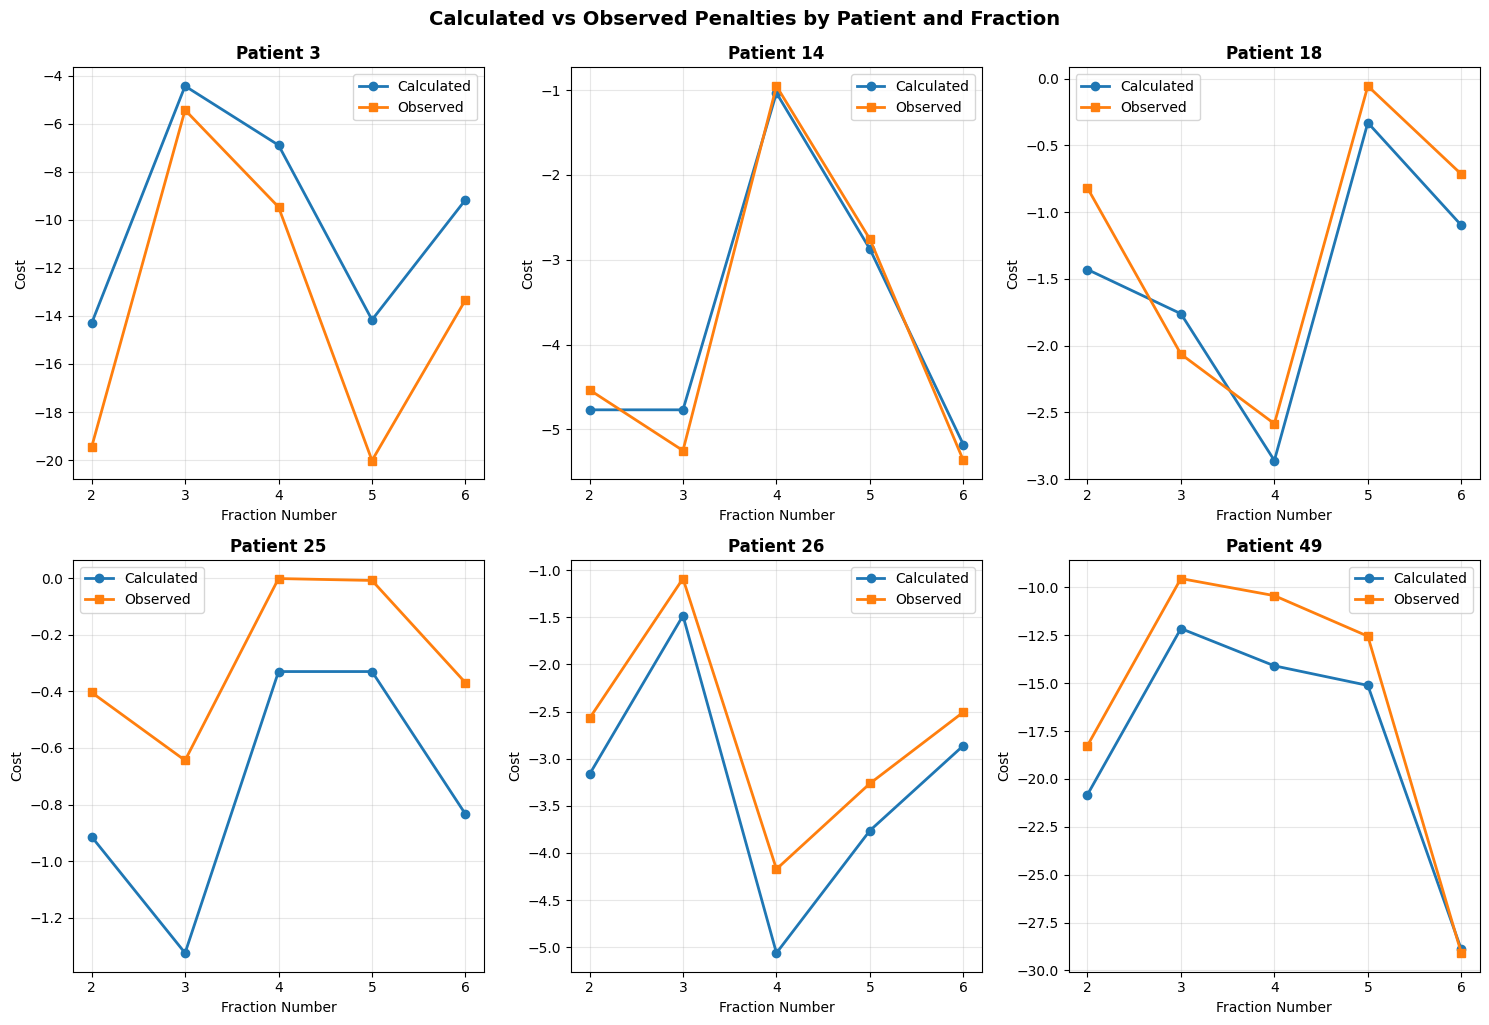

In [16]:
# Extract observed penalties from Excel data for each patient
patient_numbers = ['3', '14', '18', '25', '26', '49']  # Adjust these based on your Excel file keys
observed_penalties_all = []

for patient_num in patient_numbers:
    if patient_num in excel_data:
        # Get PTV_or column, omitting the first value (planning scan)
        ptv_or_values = -excel_data[patient_num]['PTV_or'].values[1:]  # Skip first column
        observed_penalties_all.append(ptv_or_values)
        print(f"Patient {patient_num}: {len(ptv_or_values)} fractions loaded")
    else:
        print(f"Warning: Patient {patient_num} not found in excel_data")
        observed_penalties_all.append([])

# Create subplots for each patient
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, patient_num in enumerate(patient_numbers):
    ax = axes[i]
    
    # Get data for this patient
    calculated = standard_penalties_all[i]
    observed = observed_penalties_all[i]
    
    if len(observed) > 0 and len(calculated) > 0:
        # Ensure both arrays have the same length
        min_length = min(len(calculated), len(observed))
        calculated = calculated[:min_length]
        observed = observed[:min_length]
        
        # Create fraction numbers (starting from 2 since we skip planning scan)
        fractions = list(range(2, min_length + 2))
        
        # Plot both calculated and observed penalties
        ax.plot(fractions, calculated, 'o-', label='Calculated', linewidth=2, markersize=6)
        ax.plot(fractions, observed, 's-', label='Observed', linewidth=2, markersize=6)
        
        # Customize the plot
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Fraction Number')
        ax.set_ylabel('Cost')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xticks(fractions)
        
        # Print comparison stats
        print(f"Patient {patient_num}: Calculated mean = {np.mean(calculated):.3f}, Observed mean = {np.mean(observed):.3f}")
    else:
        ax.text(0.5, 0.5, f'No data\nfor Patient {patient_num}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Calculated vs Observed Penalties by Patient and Fraction', fontsize=14, fontweight='bold', y=1.02)
plt.show()

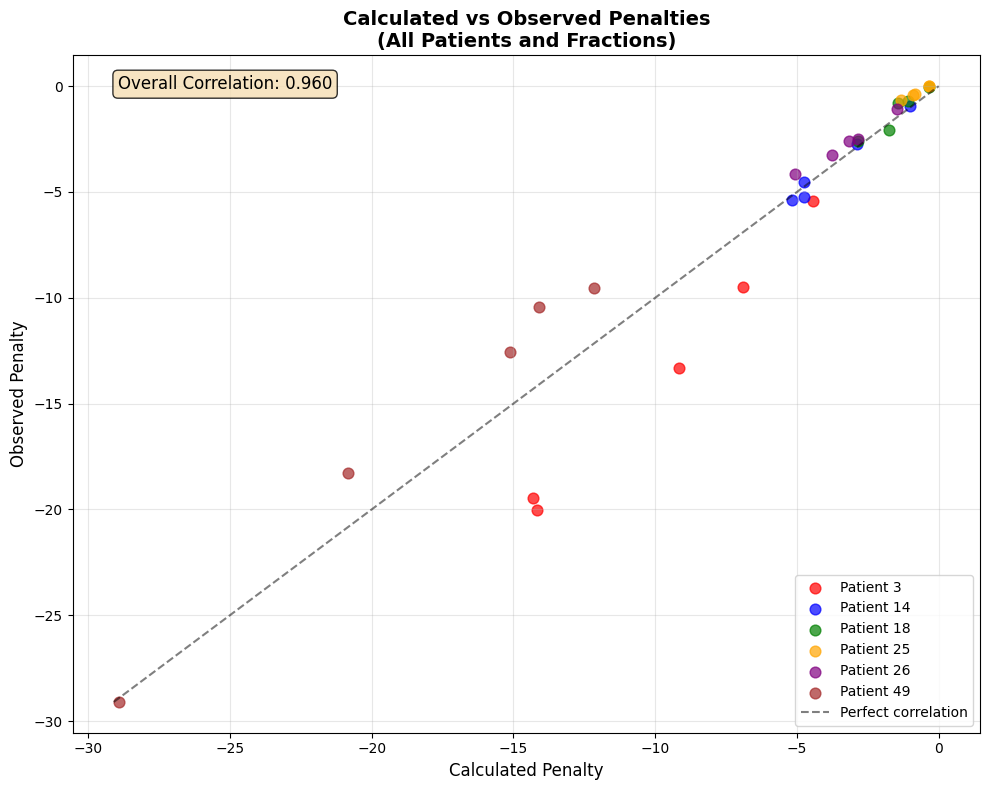


=== Summary Statistics ===
Total data points: 30
Calculated penalties - Mean: -6.208, Std: 6.842
Observed penalties - Mean: -6.257, Std: 7.256
Correlation coefficient: 0.960


In [17]:
# Create a correlation plot: Calculated vs Observed penalties
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
all_calculated = []
all_observed = []

for i, patient_num in enumerate(patient_numbers):
    calculated = standard_penalties_all[i]
    observed = observed_penalties_all[i]
    
    if len(observed) > 0 and len(calculated) > 0:
        # Ensure both arrays have the same length
        min_length = min(len(calculated), len(observed))
        calculated = calculated[:min_length]
        observed = observed[:min_length]
        
        # Add to overall arrays for correlation
        all_calculated.extend(calculated)
        all_observed.extend(observed)
        
        # Plot for this patient
        ax.scatter(calculated, observed, label=f'Patient {patient_num}', 
                  color=colors[i], s=60, alpha=0.7)

# Add perfect correlation line
if len(all_calculated) > 0 and len(all_observed) > 0:
    min_val = min(min(all_calculated), min(all_observed))
    max_val = max(max(all_calculated), max(all_observed))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect correlation')
    
    # Calculate and display correlation coefficient
    correlation = np.corrcoef(all_calculated, all_observed)[0, 1]
    ax.text(0.05, 0.95, f'Overall Correlation: {correlation:.3f}', 
            transform=ax.transAxes, fontsize=12, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('Calculated Penalty', fontsize=12)
ax.set_ylabel('Observed Penalty', fontsize=12)
ax.set_title('Calculated vs Observed Penalties\n(All Patients and Fractions)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Total data points: {len(all_calculated)}")
if len(all_calculated) > 0:
    print(f"Calculated penalties - Mean: {np.mean(all_calculated):.3f}, Std: {np.std(all_calculated):.3f}")
    print(f"Observed penalties - Mean: {np.mean(all_observed):.3f}, Std: {np.std(all_observed):.3f}")
    print(f"Correlation coefficient: {correlation:.3f}")

## old AF analysis

Patient 3: 5 fractions loaded
Patient 14: 5 fractions loaded
Patient 18: 5 fractions loaded
Patient 25: 5 fractions loaded
Patient 26: 5 fractions loaded
Patient 49: 5 fractions loaded


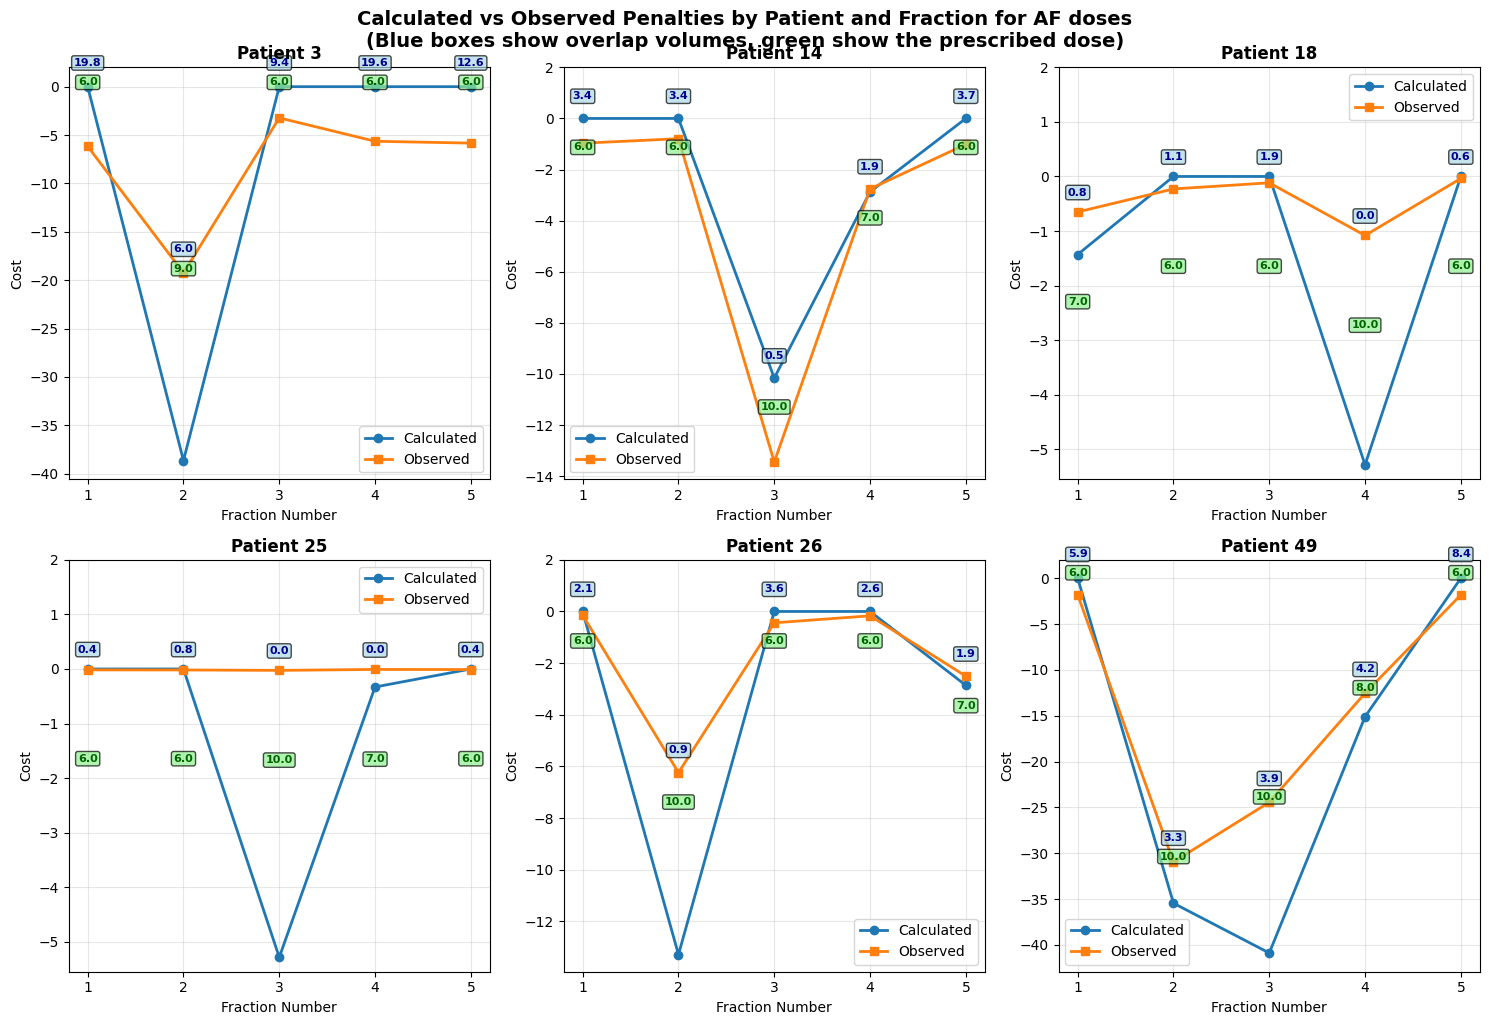

In [18]:
# Extract observed penalties from Excel data for each patient
patient_numbers = ['3', '14', '18', '25', '26', '49']  # Adjust these based on your Excel file keys
observed_AF_penalties_all = []

for patient_num in patient_numbers:
    if patient_num in excel_data:
        # Get PTV_AF column, omitting the first value (planning scan)
        ptv_af_values = -excel_data[patient_num]['PTV_AF'].values[1:]  # Skip first column
        observed_AF_penalties_all.append(ptv_af_values)
        print(f"Patient {patient_num}: {len(ptv_af_values)} fractions loaded")
    else:
        print(f"Warning: Patient {patient_num} not found in excel_data")
        observed_AF_penalties_all.append([])

# Create subplots for each patient
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, patient_num in enumerate(patient_numbers):
    ax = axes[i]
    
    # Get data for this patient
    calculated = total_penalties_old_AF[i]
    observed = observed_AF_penalties_all[i]
    
    if len(observed) > 0 and len(calculated) > 0:
        # Ensure both arrays have the same length
        min_length = min(len(calculated), len(observed))
        calculated = calculated[:min_length]
        observed = observed[:min_length]
        
        # Get overlap values for this patient (skip planning scan)
        patient_overlaps = overlaps[i][1:min_length+1]
        patient_doses = all_AF_doses[i][1:]
        # Create fraction numbers (starting from 2 since we skip planning scan)
        fractions = list(range(2, min_length + 2))
        
        # Plot both calculated and observed penalties
        ax.plot(fractions, calculated, 'o-', label='Calculated', linewidth=2, markersize=6)
        ax.plot(fractions, observed, 's-', label='Observed', linewidth=2, markersize=6)
        
        # Add overlap values as text annotations near the points
        for j, (frac, calc, obs, overlap, dosex) in enumerate(zip(fractions, calculated, observed, patient_overlaps, patient_doses)):
            # Position text slightly above the higher of the two values
            y_pos = max(calc, obs) + 0.05 * (max(max(calculated), max(observed)) - min(min(calculated), min(observed)))
            ax.text(frac, y_pos, f'{overlap:.1f}', ha='center', va='bottom', 
                   fontsize=8, color='darkblue', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))
            ax.text(frac, y_pos - 2, f'{dosex:.1f}', ha='center', va='bottom', 
                   fontsize=8, color='darkgreen', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7))

        # Customize the plot
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Fraction Number')
        ax.set_ylabel('Cost')
        ax.set_ylim(None,2)  # Set y-axis limit to start from 0
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xticks(fractions)
        ax.set_xticklabels([f-1 for f in fractions])
        
    else:
        ax.text(0.5, 0.5, f'No data\nfor Patient {patient_num}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Calculated vs Observed Penalties by Patient and Fraction for AF doses\n(Blue boxes show overlap volumes, green show the prescribed dose)', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## GO through all patients

In [19]:
import ast
patients_df = pd.read_excel('../adaptfx_results.xlsx')
# Convert the Overlaps column from string back to list
patients_df['Overlaps'] = patients_df['Overlaps'].apply(ast.literal_eval)

In [ ]:
benefits_full = []
doses_all_full = []
total_penalties_full = []
standard_penalties_all_full = []
for index in range(len(patients_df)):
    doses, accum, total_penalty = af.adaptfx_full(volumes = np.array(patients_df['Overlaps'][index]), number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = patients_df['Prescription'][index]/5, dose_steps = 0.5)
    standard_penalties = penalty_calc_full(np.array(patients_df['Overlaps'][index][1:]), patients_df['Prescription'][index]/5, 6)
    benefits_full.append(total_penalty - standard_penalties.sum())
    doses_all_full.append(doses)
    total_penalties_full.append(total_penalty)
    standard_penalties_all_full.append(standard_penalties)


0 6.5
penalty 1.4833125
1 6.5
penalty 1.8495
2 7.0
penalty 2.927
3 6.0
penalty 0.0
4 7.0
penalty 4.66275
0 6.0
penalty 0.0
1 7.5
penalty 11.6979375
2 6.5
penalty 4.5290625
3 6.5
penalty 3.4130625
4 6.5
penalty 3.4944375
0 6.0
penalty 0.0
1 8.0
penalty 21.186
2 6.5
penalty 5.5753125
3 6.0
penalty 0.0
4 6.5
penalty 7.4178749999999996
0 6.5
penalty 11.5970625
1 6.5
penalty 9.452250000000001
2 6.5
penalty 13.236187500000002
3 7.0
penalty 24.29925
4 6.5
penalty 9.057
0 6.5
penalty 10.940249999999999
1 6.5
penalty 10.748437500000001
2 6.0
penalty 0.0
3 7.0
penalty 28.64525
4 7.0
penalty 30.7785
0 7.0
penalty 1.0322500000000001
1 6.5
penalty 0.6579375000000001
2 6.5
penalty 1.628625
3 7.0
penalty 3.52325
4 8.0
penalty 2.2110000000000003
0 7.5
penalty 19.03875
1 7.5
penalty 21.180750000000003
2 8.0
penalty 28.314
3 9.0
penalty 35.261250000000004
4 8.0
penalty 25.344
0 7.0
penalty 3.47025
1 9.0
penalty 6.9990000000000006
2 7.0
penalty 3.86775
3 8.5
penalty 9.403125000000001
4 8.5
penalty 7.8171

In [ ]:
numbers = patients_df['Patient number']
old_benefits = np.array(patients_df['benefits'])
new_benefits = np.array(benefits_full).round(1)

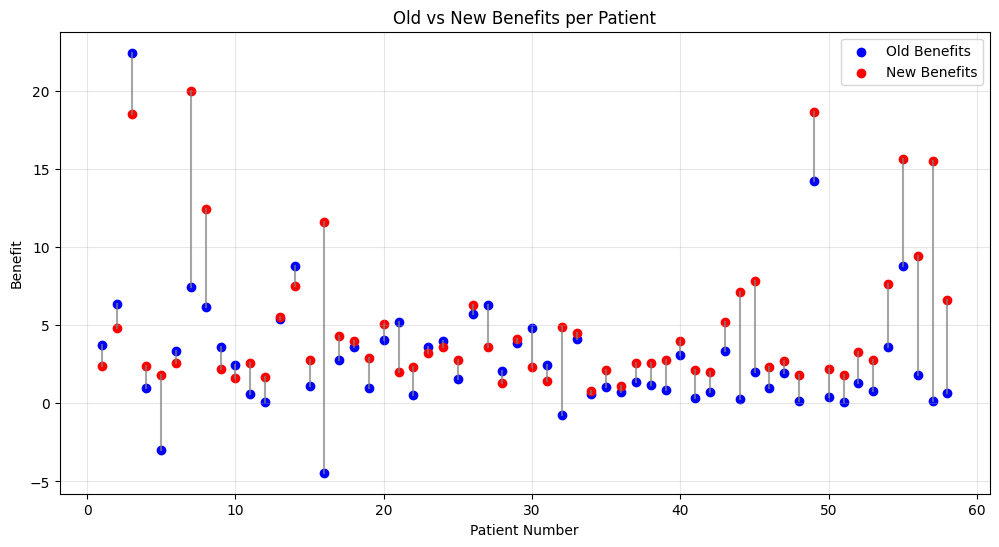

In [ ]:
plt.figure(figsize=(12, 6))
x = numbers.values

plt.scatter(x, old_benefits, color='blue', label='Old Benefits')
plt.scatter(x, new_benefits, color='red', label='New Benefits')

for i in range(len(x)):
    plt.plot([x[i], x[i]], [old_benefits[i], new_benefits[i]], color='gray', linestyle='-', alpha=0.7)

plt.xlabel('Patient Number')
plt.ylabel('Benefit')
plt.title('Old vs New Benefits per Patient')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Text(0.5, 1.0, 'new benefits 0 intercept in ccGy')

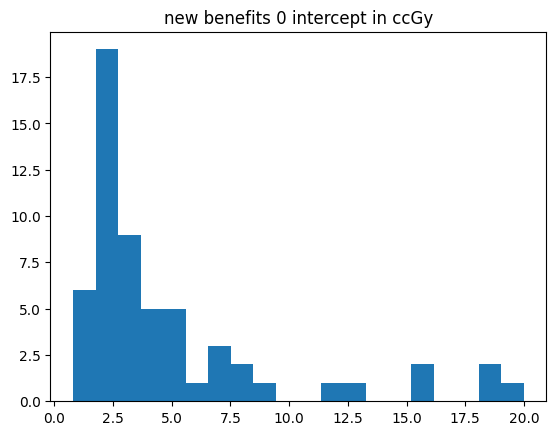

In [ ]:
plt.hist(new_benefits, bins = 20)
plt.title('new benefits 0 intercept in ccGy')